In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math

%matplotlib inline
rcParams['font.family'] = 'Times New Roman'
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18

[]

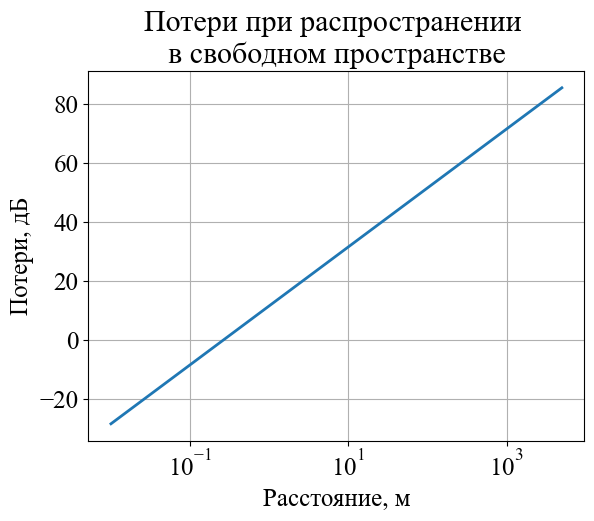

In [27]:
# В свободном пространстве

d = np.linspace(0.01, 5000, 10000)      # массив расстояний
freq = 90 * 10 ** 6                    # частота
c = 3 * 10 ** 8
wavelength = c/freq                     # длина волны
Los_freespace = -147.56 + 20 * np.log10(freq) + 20 * np.log10(d)

plt.plot(d, Los_freespace)
plt.grid(True)
plt.xlabel('Расстояние, м')
plt.ylabel('Потери, дБ')
plt.title('Потери при распространении \nв свободном пространстве')
plt.semilogx()

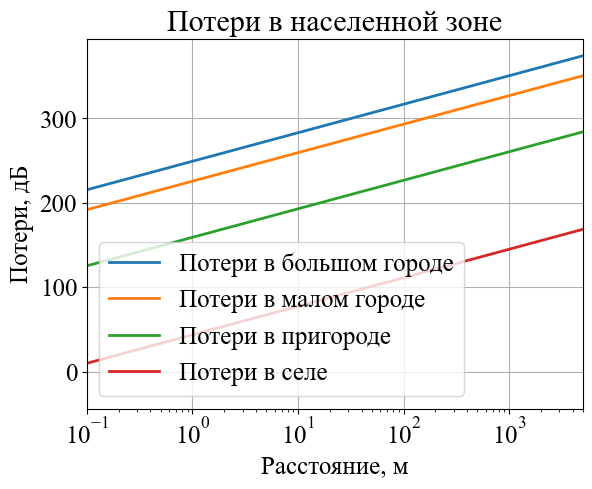

In [28]:
# Модель Окамуры-Хата
h_t = 50    # Высота передающей антенны
h_r = 5     # Высота приемной антенны
A_small = (1.1 * np.log10(freq) - 0.7) * h_r - (1.56 * np.log10(freq) - 0.8)    # Коэффициент ослабления для малых городов
A_big = 3.2 * (np.log10(11.75 * h_r)) ** 2 - 4.97   # Коэффициент ослабления для больших городов
L_small = 69.55 + 26.16 * np.log10(freq) - 13.82 * np.log10(h_t) - A_small + (44.9 - 6.55 * np.log10(h_t)) * np.log10(d)    # Потери в малых городах
L_big = 69.55 + 26.16 * np.log10(freq) - 13.82 * np.log10(h_t) - A_big + (44.9 - 6.55 * np.log10(h_t)) * np.log10(d)        # Потери в больших городах
L_suburbs = L_big - 2 * np.log10(freq / 28) ** 2 - 5.4      # Потери в пригороде
L_country = L_big - 4.78 * np.log10(freq) ** 2 + 17.33 * np.log10(freq) - 40.94     # Потери в сельской местности

# Графики зависимостей потерь от расстояния
plt.plot(d, L_big, label = 'Потери в большом городе')
plt.plot(d, L_small, label = 'Потери в малом городе')
plt.plot(d, L_suburbs, label = 'Потери в пригороде')
plt.plot(d, L_country, label = 'Потери в селе')
plt.semilogx()
plt.xlim(10 ** (-1), 5000)
plt.grid(True)
plt.title('Потери в населенной зоне')
plt.ylabel('Потери, дБ')
plt.xlabel('Расстояние, м')
plt.legend()

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_17548\3344216701.py:10: RuntimeWarning: invalid value encountered in log10
  L_kb = 57.1 + A + np.log10(freq) + 18 * np.log10(d) - 18 * np.log10(h_bs - h_roof) - 18 * np.log10(1 - d ** 2 / (17 * (h_bs - h_roof))) + Los_freespace


Text(0.5, 1.0, 'Потери в модели Ксю-Бертони')

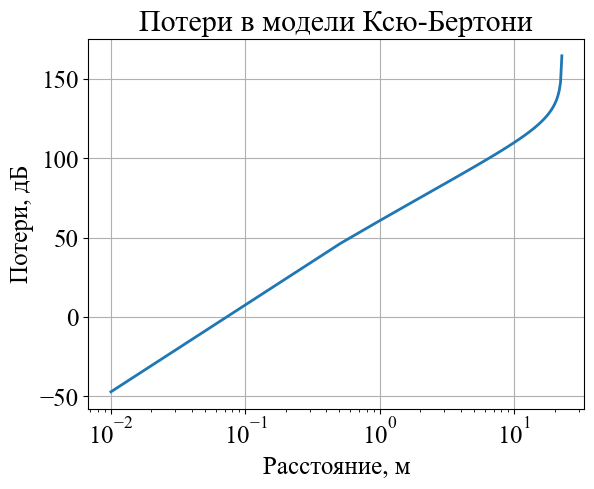

In [29]:
# Модель Ксю-Бертони // Walfisch-Bertoni
h_bs = 85           # Высота базовой станции
h_roof = 55         # Высота крыш
street_d = 20       # Ширина улиц
h_0 = 1.5           # Высота приемного мобильного устройства

alpha = (h_bs - h_roof)/d
w = alpha / np.sqrt(street_d / wavelength)
A = 5 * np.log10( (w/2) ** 2 + (h_roof -  h_0) ** 2 ) - 9 * np.log10(w) + 20 * np.log10( np.arctan( (2 * (h_roof - h_0) ) / w ))
L_kb = 57.1 + A + np.log10(freq) + 18 * np.log10(d) - 18 * np.log10(h_bs - h_roof) - 18 * np.log10(1 - d ** 2 / (17 * (h_bs - h_roof))) + Los_freespace

plt.plot(d, L_kb)
plt.semilogx()
plt.grid(True)
plt.xlabel('Расстояние, м')
plt.ylabel('Потери, дБ')
plt.title ('Потери в модели Ксю-Бертони')